# Welcome to the Computational Politics Analytics Demo!

> * Presented by: Jian Roachell (银剑), has technical knowledge in data-mining, NLP machine-learning, computational economics, and 2 years of experience in Business Intelligence development, advanced regression and predictive analytics modeling, econometrics, and algorithmic game-theory. In addition, he previously started his own AI startup in the USA, with strong startup-entrepreneurship experience with a working-history in supply chain and information technology industry. 


> * Data: scraped MIIT policies from ministry website and store into policy database








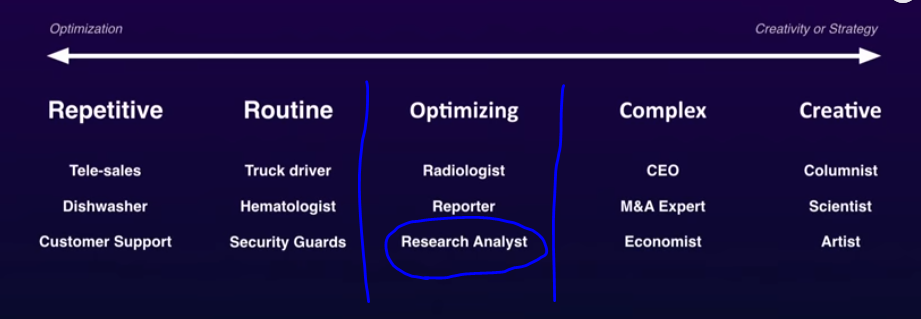

In [90]:
Image(filename='../ASUS/Downloads/ai_colab.png') 

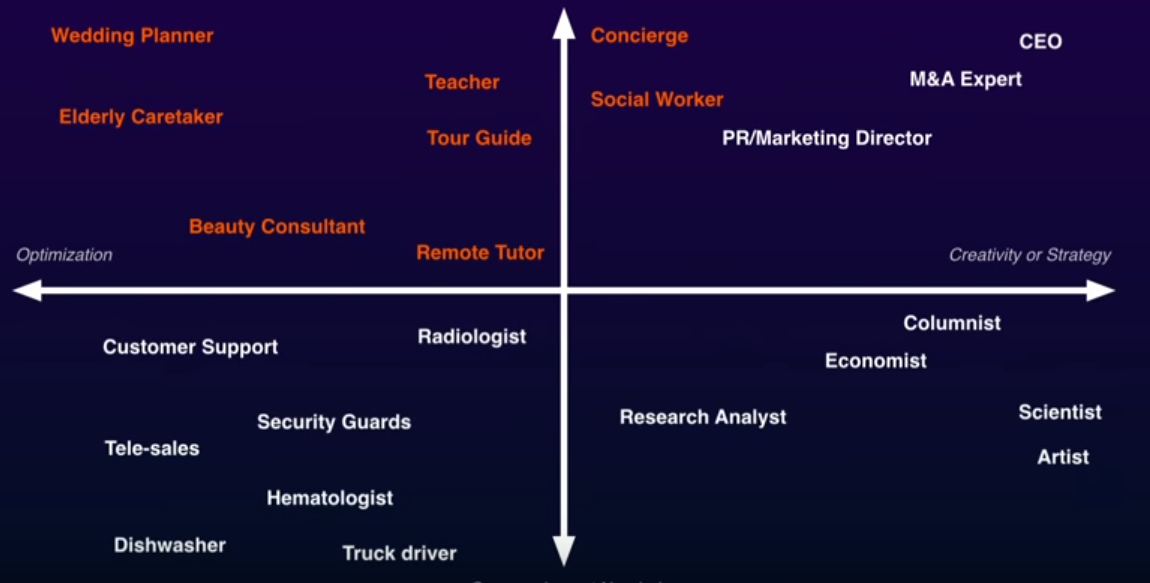

In [91]:
Image(filename='../ASUS/Downloads/ai_colab2.png') 

# CURRENT China Policy analysis is based on:
1. ***{Continuous monitoring and analysis of a large amount of Chinese-language sources}***
> * Further breakdown the activities and hours spent:
> * reading gov websites (2 hours /day)
> * Key words search for policies notifications (2 hrs / day)
> * news publications (30 min / day)
2. ***{Expert skills in compiling and analyzing Chinese data on market developments and digital trends}***
> * Further breakdown the activities and hours spent:
> * general search engine for whatever topic is relevant (1 hour / day)
> * repetitive sources (2 hours / day)
> * graphical picture search (varies)
> * identifying numbers stats, databases (varies)

# The solution: Optimizing Policy Research with AI and Analytics Tools
> 1. This can be enhanced by Natural Language Process model that trains on existing Chinese-language sources to categorizes into topics to detect important signals for the analysis, this decrease reading time and increase productivity.
> 2. Data analytics can automate the compilations and provide a dashboard that prioritize, categorize, and highlight the trends that are the most relevant and important for your clients. 

# Goal 1:  Classification of Policies
> * Each post goes into each bag (Industries 'hangye', Themes, Type) as well as Expanding or Tightening trends
> * Each post will output the content of elements of each Hanye, Themes,Types_policy it represent

In [97]:
df.head()

,date,url,title,n1146295,n1652858,n1652930,n3757016,n4509650,n3757022,n4509627,...,day,weekday,week,month,year,quarter,weekdays,QTR,doc_release,policy_explained
0,2002-05-24,http://www.miit.gov.cn/n1146295/n1652858/n1653...,集成电路设计企业及产品认定管理办法问答,0.014273,0.042387,0.0,0.0,0.0,0.0,0.0,...,24,星期五,21,5,2002,Q2,5,2,0,1
1,2002-05-24,http://www.miit.gov.cn/n1146295/n1652858/n1653...,集成电路设计企业及产品认定管理办法问答,0.014273,0.042387,0.0,0.0,0.0,0.0,0.0,...,24,星期五,21,5,2002,Q2,5,2,0,1
2,2003-03-20,http://www.miit.gov.cn/n1146295/n1652858/n1653...,苏金生局长就重新调整《电信业务分类目录》答记者问,0.014273,0.042387,0.0,0.0,0.0,0.0,0.0,...,20,星期四,12,3,2003,Q1,4,1,0,1
3,2003-03-20,http://www.miit.gov.cn/n1146295/n1652858/n1653...,苏金生局长就重新调整《电信业务分类目录》答记者问,0.014273,0.042387,0.0,0.0,0.0,0.0,0.0,...,20,星期四,12,3,2003,Q1,4,1,0,1
4,2004-02-24,http://www.miit.gov.cn/n1146295/n1652858/n1653...,彭晓芳副司长解读电信资费监管思路 积极稳妥推进资费改革,0.014273,0.042387,0.0,0.0,0.0,0.0,0.0,...,24,星期二,8,2,2004,Q1,2,1,0,1


In [103]:
print(classify_policy(df.title[9000]))
print("Title of Policy post:", df.title[9000])

Industry: [['汽车']] 
Themes: [['补助']] 
Policy Type: [None] 
Policy Tighten: [['审核']] 
Policy Expansion: [None]
None
Title of Policy post: 关于2017年及以前年度新能源汽车推广应用补助资金初步审核情况的公示


# Goal 2: Topical Modeling with Word2Vec tools
> * It is a row of real valued numbers (as opposed to dummy numbers) where each point ***captures a dimension of the word’s meaning and where semantically similar words have similar vectors***. This means that words such as wheel and engine should have similar word vectors to the word car (because of the similarity of their meanings), whereas the word banana should be quite distant.
> * ***create word vec from ministry  websites  and analyse them to see semantic similarities ***

In [104]:
for element in MIIT_w2v.most_similar(u"中国"): # notice that 2025 is the closest to 中国， which means 
    print(element[0], element[1])

2025 0.8080620169639587
， 0.7938441038131714
成效 0.7683783769607544
郑州 0.7640379667282104
增长 0.7637760639190674
船舶工业 0.7612121105194092
解答 0.7602002620697021
增材 0.7597740888595581
金融 0.7581577301025391
基金 0.7567598819732666


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [7]:
import pyLDAvis.sklearn
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import gensim
import os
import dill
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
from gensim.models import Word2Vec as w2v
MIIT_w2v = w2v.load(os.path.join("../ASUS/Desktop/Thesis/trained", "MIIT.w2v"))
dill.load_session('notebook_env.db')
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\ASUS\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.051602 -0.381531       1        1  22.917646
1     -0.226255 -0.000920       2        1  22.417755
0      0.117458  0.069506       3        1  18.735683
2      0.292898  0.160948       4        1  18.228643
3     -0.235702  0.151997       5        1  17.700279, topic_info=     Category         Freq  Term        Total  loglift  logprob
term                                                           
104   Default  4632.000000    工业  4632.000000  30.0000  30.0000
60    Default  3653.000000   信息化  3653.000000  29.0000  29.0000
54    Default  3483.000000     部  3483.000000  28.0000  28.0000
109   Default  1846.000000    公示  1846.000000  27.0000  27.0000
112   Default  1495.000000    生产  1495.000000  26.0000  26.0000
30    Default  1501.000000    通知  1501.000000  25.0000  25.0000
143   Default  1155.000000    公告  1155.000000  24.0000  24.0000
640   Default  1278.000000   办公厅  1278.000000  23.0000  23.0000
103   Default  1077.000000     号  1077.000000  22.0000  22.0000
286   Default   993.000000    名单   993.000000  21.0000  21.0000
0     Default   968.000000    产品   968.000000  20.0000  20.0000
1     Default  2089.000000    企业  2089.000000  19.0000  19.0000
73    Default   947.000000     项   947.000000  18.0000  18.0000
3427  Default  1031.000000  2017  1031.000000  17.0000  17.0000
2800  Default  1028.000000  2018  1028.000000  16.0000  16.0000
634   Default   830.000000    公开   830.000000  15.0000  15.0000
75    Default   928.000000    印发   928.000000  14.0000  14.0000
524   Default   781.000000    道路   781.000000  13.0000  13.0000
521   Default   770.000000  机动车辆   770.000000  12.0000  12.0000
370   Default   853.000000    意见   853.000000  11.0000  11.0000
221   Default   723.000000    车辆   723.000000  10.0000  10.0000
61    Default   755.000000    发展   755.000000   9.0000   9.0000
3564  Default   654.000000    答复   654.000000   8.0000   8.0000
250   Default   653.000000     拟   653.000000   7.0000   7.0000
240   Default   729.000000    项目   729.000000   6.0000   6.0000
234   Default   648.000000    开展   648.000000   5.0000   5.0000
3560  Default   623.000000   十二届   623.000000   4.0000   4.0000
484   Default   619.000000    部门   619.000000   3.0000   3.0000
1245  Default   608.000000    会议   608.000000   2.0000   2.0000
697   Default   573.000000    技术   573.000000   1.0000   1.0000
...       ...          ...   ...          ...      ...      ...
634    Topic5   829.907837    公开   830.707581   1.7306  -3.0279
697    Topic5   572.828796    技术   573.644104   1.7302  -3.3986
1323   Topic5   505.377472  国家标准   506.170105   1.7300  -3.5239
299    Topic5   503.713501    行业   504.509552   1.7300  -3.5272
507    Topic5   474.779877    征集   475.578339   1.7299  -3.5864
1281   Topic5   460.925018    条件   461.719086   1.7299  -3.6160
734    Topic5   393.269592  行业标准   394.064697   1.7296  -3.7747
29     Topic5   385.425934    规范   386.220917   1.7295  -3.7949
635    Topic5   380.253571    征求   381.047668   1.7295  -3.8084
24     Topic5   383.914734    解读   384.738495   1.7294  -3.7988
2482   Topic5   357.283325   强制性   358.080170   1.7294  -3.8707
252    Topic5   348.083923    汽车   348.896088   1.7293  -3.8968
815    Topic5   291.228210  征求意见   292.020874   1.7289  -4.0751
767    Topic5   282.186768    报批   282.977203   1.7288  -4.1067
816    Topic5   266.858124     稿   267.651154   1.7286  -4.1625
156    Topic5   253.067978    通信   253.868469   1.7284  -4.2156
688    Topic5   336.099915   委员会   337.199402   1.7283  -3.9318
91     Topic5   186.216385    标准   187.013199   1.7273  -4.5223
770    Topic5   189.880035    指南   190.702927   1.7273  -4.5028
185    Topic5   166.031204    安全   166.829681   1.7268  -4.6370
241    Topic5   153.109604    方案   153.910583   1.7264  -4.7181
548    Topic5   149.296051    符合   150.085999   1.7263  -4.7433
1324   Topic5   137.623001   标准化   138.424423   1.7258  -4.

# How to interpret this?
> * There are 5 main topics: Each topic has its list of most important words
> * The red represents the word frequency
> * size of the bubble measure how much information distribution of each topic contains relative to the entire population of polcies.


## Topic Interpretation:
> ### Topic 1 (0): 公示工业信息产品, indutrial and business information products
> ### Topic 2 (1): 每年的工业信息印发, publicizing public opinion about industrial matters (important)
> ### Topic 3 (2): 开展互联网企业产品，opening up internet products (important)
> ### Topic 4 (3): 车辆生产与设备, car production and equipments
> ### Topic 5 (4): 公开技术国家标准, setting national business standards (MOST important)

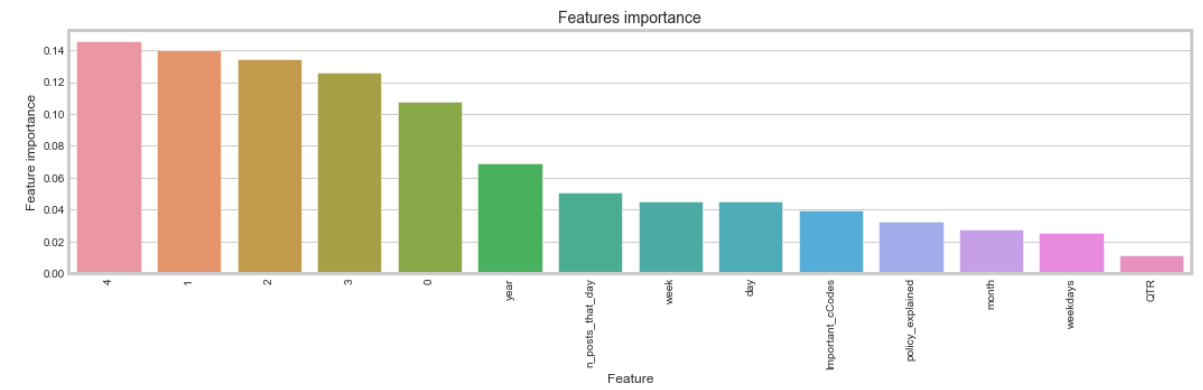

In [85]:
Image(filename='../ASUS/Downloads/feat_import.png') 

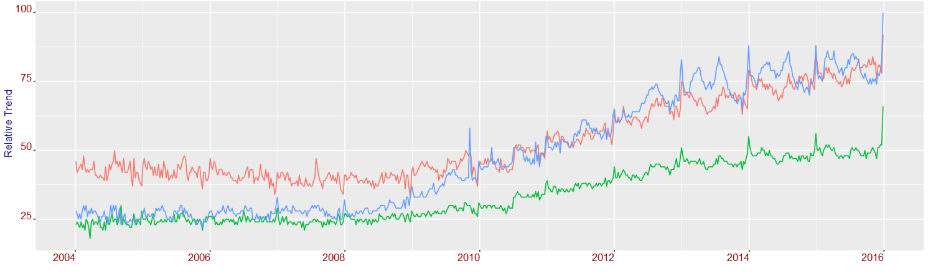

In [86]:
Image(filename='../ASUS/Downloads/topic_graph.png') 

## DEEP DIVE: Decompose the time series and dive deeper into the policy

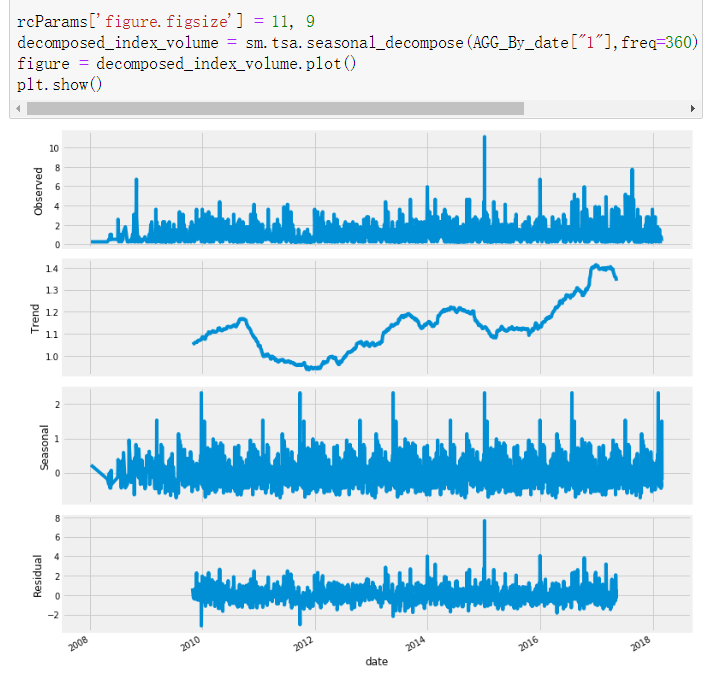

In [88]:
Image(filename='../ASUS/Downloads/image.png')

> * ***Observed***: Numbers of posts each day concerning policies and public opinion
> * ***Trend***: The overall pattern of the movement,consistent upwards or downwards slope of a time series
> * ***Seasonal***: explore seasonal pattern and clear periodic pattern of a time series(like sine funtion)
> * ***Residual***: how far it time series deviates from the norm or mean

# Estimate the value of applying Analytics and ML to worklow

> ## Status Quo: x amount of hours, weeks, to do one project for a client?
> ## With Machine Learning and Policy Analytics: scale out the operations at a click of a button

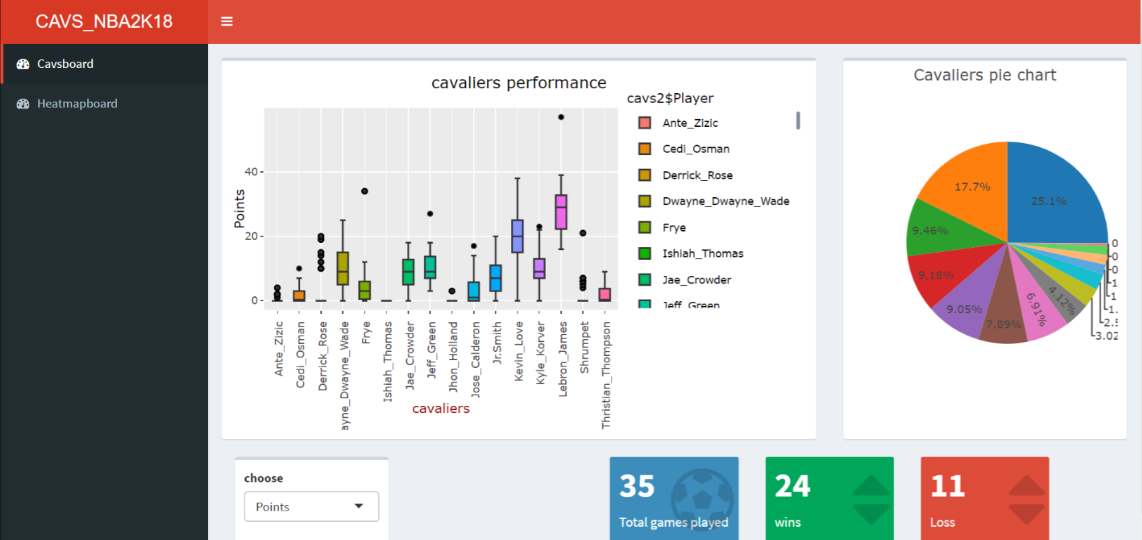

In [94]:
Image(filename='../ASUS/Downloads/dashboard.png')

# Conclusion and going forward:
> * MOFCOM: ministry of Commerce
> * NDRC: National Development and Reform Commission (NDRC): macroeconomic planning
